In [55]:
import os
from github import Github
from dotenv import load_dotenv
import networkx as nx
import csv

# Create an empty graph
graph = nx.Graph()

In [56]:
# Open the CSV file and read the data for users
with open('dataset/users.csv', 'r') as f:
    reader = csv.reader(f)
    for i, row in enumerate(reader):
        if i == 0: # Skip the header columns
            continue
        # transform the string of repositories into an array of strings
        row[2] = [x for x in row[2].replace(' ', '').replace('[', '').replace(']', '').replace('\'', '').split(',')]
        # Add the user node to graph with blue color
        graph.add_node(row[0], name=row[1], repos=row[2], color="#7FB2FD")

In [57]:
# Open the CSV file and read the data for repositories
with open('dataset/repos.csv', 'r') as f:
    reader = csv.reader(f)
    for i, row in enumerate(reader):
        if i == 0: # Skip the header columns
            continue

        # transform the string of languages into an array of strings
        row[2] = [x for x in row[2].replace(' ', '').replace('[', '').replace(']', '').replace('\'', '').split(',')]

        # Add the repository node to graph with pink color
        graph.add_node(row[0], name=row[1], languages=row[2], color="#FF8CCD")


In [58]:
# Add edges between users and repositories based on the users' list of repositories
for node in graph.nodes:
    # if it's a user node
    if node[0] == "u":
        # for each repository in the user's list of repositories
        for repo in graph.nodes[node]['repos']:
            # add an edge between the user and the repository
            graph.add_edge(node, repo)

In [59]:
# Print the number of nodes and edges
print("Number of nodes:", graph.number_of_nodes())
print("Number of edges:", graph.number_of_edges())

Number of nodes: 4432
Number of edges: 6375


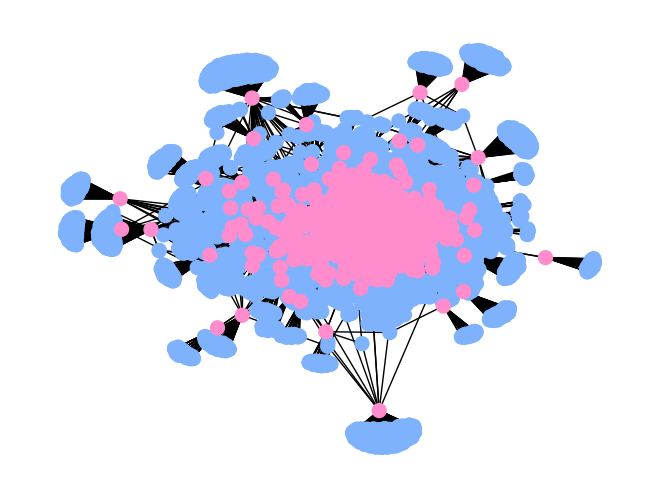

In [60]:
# Draw the graph using color property to distinguish users and repositories
nx.draw(graph, node_color=[graph.nodes[node]['color'] for node in graph.nodes], node_size=100)

In [61]:
# Calculate the degree centrality of all nodes
degree_centrality = nx.degree_centrality(graph)

# Split the degree centrality for users and repositories
users_degree_centrality = { k: v for k, v in degree_centrality.items() if k.startswith('u_')}
repos_degree_centrality = { k: v for k, v in degree_centrality.items() if k.startswith('r_')}

# Print the degree centrality of first 10 users in descending order
print("\nDegree centrality of first 10 users in descending order:")
for node in sorted(users_degree_centrality, key=users_degree_centrality.get, reverse=True)[:10]:
    print(node, users_degree_centrality[node])

# Print mean degree centrality for users
print("\nMean degree centrality for users:", sum(users_degree_centrality.values())/len(users_degree_centrality))

# Print the degree centrality of first 10 repositories in descending order
print("\nDegree centrality of first 10 repositories in descending order:")
for node in sorted(repos_degree_centrality, key=repos_degree_centrality.get, reverse=True)[:10]:
    print(node, repos_degree_centrality[node])

# Print mean degree centrality for repositories
print("\nMean degree centrality for repositories:", sum(repos_degree_centrality.values())/len(repos_degree_centrality))


Degree centrality of first 10 users in descending order:
u_1710 0.22432859399684044
u_1387 0.22297449785601445
u_2712 0.009027307605506657
u_776 0.006093432633716994
u_1205 0.004062288422477996
u_1461 0.0038366057323403293
u_2125 0.003610923042202663
u_2180 0.003610923042202663
u_3060 0.002933874971789664
u_3222 0.002933874971789664

Mean degree centrality for users: 0.0004184779376462035

Degree centrality of first 10 repositories in descending order:
r_667 0.07086436470322727
r_963 0.05055292259083728
r_126 0.028887384337621305
r_216 0.028887384337621305
r_76 0.023696682464454975
r_2 0.02279395170390431
r_3 0.020537124802527645
r_225 0.019183028661701646
r_969 0.018731663281426315
r_115 0.01828029790115098

Mean degree centrality for repositories: 0.001447411619343704


In [62]:
# Calculate the betweenness centrality of all nodes
betweenness_centrality = nx.betweenness_centrality(graph)

# Calculate the betweenness centrality of users nodes
users_betweenness_centrality = { k: v for k, v in betweenness_centrality.items() if k.startswith('u_')}

In [63]:

# Print the betweenness centrality of first 10 users in descending order
for node, centrality in sorted(users_betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]:
    print("Node", node, "has betweenness centrality", centrality)

# Print mean betweenness centrality for users
print("\nMean betweenness centrality for users:", sum(users_betweenness_centrality.values())/len(users_betweenness_centrality))


Node u_1710 has betweenness centrality 0.4703289313283779
Node u_1387 has betweenness centrality 0.4398901534290559
Node u_2712 has betweenness centrality 0.009618500765823849
Node u_2125 has betweenness centrality 0.004504485559402676
Node u_2180 has betweenness centrality 0.003881150205018476
Node u_3174 has betweenness centrality 0.0030214588822351637
Node u_957 has betweenness centrality 0.0025193007937907705
Node u_1207 has betweenness centrality 0.0024694943601352936
Node u_776 has betweenness centrality 0.002030059550218193
Node u_28 has betweenness centrality 0.001999912391358061

Mean betweenness centrality for users: 0.00028614468189174115


In [64]:
# Calculate the eigenvector centrality of all nodes
eigenvector_centrality = nx.eigenvector_centrality(graph, max_iter=1000)

# Calculate the eigenvector centrality of repos nodes
repos_eigenvector_centrality = { k: v for k, v in eigenvector_centrality.items() if k.startswith('r_')}

# Calculate the eigenvector centrality of users nodes
users_eigenvector_centrality = { k: v for k, v in eigenvector_centrality.items() if k.startswith('u_')}

# Print the eigenvector centrality of first 10 repos in descending order
print("\nEigenvector centrality of first 10 repositories in descending order:")
for node, centrality in sorted(repos_eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:10]:
    print("Repository", node, "has eigenvector centrality", centrality)

# Print the eigenvector centrality of first 10 users in descending order
print("\nEigenvector centrality of first 10 users in descending order:")
for node, centrality in sorted(users_eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:10]:
    print("User", node, "has eigenvector centrality", centrality)


Eigenvector centrality of first 10 repositories in descending order:
Repository r_667 has eigenvector centrality 0.02807241600112121
Repository r_963 has eigenvector centrality 0.0252872002485827
Repository r_126 has eigenvector centrality 0.02508444065051212
Repository r_204 has eigenvector centrality 0.024918586221542628
Repository r_969 has eigenvector centrality 0.02484594166364357
Repository r_3 has eigenvector centrality 0.024744005513770605
Repository r_41 has eigenvector centrality 0.024621133427994935
Repository r_252 has eigenvector centrality 0.02459630822116519
Repository r_0 has eigenvector centrality 0.02452737750133048
Repository r_115 has eigenvector centrality 0.024420314891656622

Eigenvector centrality of first 10 users in descending order:
User u_1710 has eigenvector centrality 0.49917648037912005
User u_1387 has eigenvector centrality 0.4976560737491123
User u_2712 has eigenvector centrality 0.021178422969835194
User u_776 has eigenvector centrality 0.014040285764

In [65]:
# Calculate different subgraphs based on language of repositories
subgraphs = {}
for node in graph.nodes:
    if node[0] == "r":
        for language in graph.nodes[node]['languages']:
            if language not in subgraphs:
                subgraphs[language] = nx.Graph()
            subgraphs[language].add_node(node)
            for neighbor in graph.neighbors(node):
                subgraphs[language].add_node(neighbor)
                subgraphs[language].add_edge(node, neighbor)

In [70]:
# Print the number of nodes and edges in each subgraph
for language in subgraphs:
    print("Number of nodes in subgraph", language, ":", subgraphs[language].number_of_nodes())
    print("Number of edges in subgraph", language, ":", subgraphs[language].number_of_edges())
    

Number of nodes in subgraph Ruby : 2780
Number of edges in subgraph Ruby : 4138
Number of nodes in subgraph JavaScript : 1612
Number of edges in subgraph JavaScript : 2021
Number of nodes in subgraph C : 716
Number of edges in subgraph C : 847
Number of nodes in subgraph C++ : 283
Number of edges in subgraph C++ : 317
Number of nodes in subgraph Shell : 1288
Number of edges in subgraph Shell : 1494
Number of nodes in subgraph Makefile : 407
Number of edges in subgraph Makefile : 436
Number of nodes in subgraph Assembly : 257
Number of edges in subgraph Assembly : 267
Number of nodes in subgraph Objective-C : 431
Number of edges in subgraph Objective-C : 496
Number of nodes in subgraph TeX : 142
Number of edges in subgraph TeX : 145
Number of nodes in subgraph Roff : 281
Number of edges in subgraph Roff : 290
Number of nodes in subgraph M4 : 102
Number of edges in subgraph M4 : 101
Number of nodes in subgraph Ada : 102
Number of edges in subgraph Ada : 101
Number of nodes in subgraph Pa

In [67]:
graph_for_clustering = graph.copy()
# remove all users nodes from the graph
for node in graph.nodes:
    if node[0] == "u":
        graph_for_clustering.remove_node(node)

# add edge between repositories if they have at least one common language
for node1 in graph_for_clustering.nodes:
    for node2 in graph_for_clustering.nodes:
        if node1 != node2:
            if len(set(graph_for_clustering.nodes[node1]['languages']).intersection(set(graph_for_clustering.nodes[node2]['languages']))) > 0:
                graph_for_clustering.add_edge(node1, node2)

# Create a graph for every language
graph_for_clustering_language = {}
for language in subgraphs:
    graph_for_clustering_language[language] = graph_for_clustering.copy()
    for node in graph_for_clustering.nodes:
        if language not in graph_for_clustering_language[language].nodes[node]['languages']:
            graph_for_clustering_language[language].remove_node(node)

In [68]:
# Calculate the clustering coefficient of the graph only for nodes in graph_for_clustering_tex
clustering_coefficient = {}
for language in subgraphs:
    clustering_coefficient[language] = nx.clustering(graph_for_clustering, nodes=graph_for_clustering_language[language].nodes)

# Print the clustering coefficient of first 10 repositories in descending order only for Python, Java and JavaScript repositories
for language in subgraphs:
    print("\nClustering coefficient of repositories in descending order for ", language, ":")
    for node, coefficient in sorted(clustering_coefficient[language].items(), key=lambda x: x[1], reverse=True):
        print("Repository", node, "has clustering coefficient", coefficient)


Clustering coefficient of repositories in descending order for  Ruby :
Repository r_0 has clustering coefficient 1.0
Repository r_8 has clustering coefficient 1.0
Repository r_9 has clustering coefficient 1.0
Repository r_15 has clustering coefficient 1.0
Repository r_16 has clustering coefficient 1.0
Repository r_19 has clustering coefficient 1.0
Repository r_20 has clustering coefficient 1.0
Repository r_21 has clustering coefficient 1.0
Repository r_22 has clustering coefficient 1.0
Repository r_23 has clustering coefficient 1.0
Repository r_24 has clustering coefficient 1.0
Repository r_26 has clustering coefficient 1.0
Repository r_28 has clustering coefficient 1.0
Repository r_29 has clustering coefficient 1.0
Repository r_33 has clustering coefficient 1.0
Repository r_37 has clustering coefficient 1.0
Repository r_38 has clustering coefficient 1.0
Repository r_39 has clustering coefficient 1.0
Repository r_40 has clustering coefficient 1.0
Repository r_41 has clustering coeffic

Il clustering coefficient è calcolato come segue:
(2\*T) / (k\*(k\-1))
dove:
- T è il numero di triangoli esistono nel grafo a partire dal nodo preso in considerazione
- k è il numero di archi uscenti dal nodo preso in considerazione

In questo caso, quindi,
- Nodo 0: (2\*7) / (5\*(5-1)) = 14 / 20 = 0.7
- Nodo 1: (2\*7) / (5\*(5-1)) = 14 / 20 = 0.7
- Nodo 2: (2\*6) / (4\*(4-1)) = 12 / 12 = 1
- Nodo 3: (2\*6) / (4\*(4-1)) = 12 / 12 = 1
- Nodo 4: (2\*6) / (4\*(4-1)) = 12 / 12 = 1
- Nodo 5: (2\*1) / (2\*(2-1)) = 2 / 2 = 1

Number of triangles: {0: 7, 1: 7, 2: 6, 3: 6, 4: 6, 5: 1}
Degree: [(0, 5), (1, 5), (2, 4), (3, 4), (4, 4), (5, 2)]
Clustering coefficient: {0: 0.7, 1: 0.7, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0}


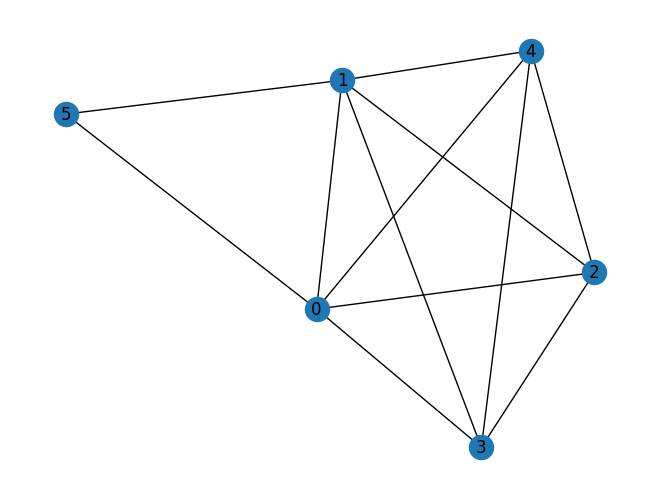

In [77]:
# Test for clustering coefficient
G = nx.complete_graph(5)
# create a non complete graph
G.add_node(5)
G.add_edge(5, 0)
G.add_edge(5, 1)
nx.draw(G, with_labels=True)
print("Number of triangles:", nx.triangles(G))
print("Degree:", G.degree())
print("Clustering coefficient:", nx.clustering(G))